In [2]:
pip install imbalanced-learn



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


imports


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.sparse
import sys, os, re, csv, codecs
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.models import Sequential
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout,GlobalAveragePooling1D
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from scipy.sparse import vstack
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\talme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\talme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\talme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Loading Our Dataset

In [4]:
df1=pd.read_csv(r'C:\Users\talme\Tal_and_Tom_Final_project\data.csv')
df2=pd.read_csv(r'C:\Users\talme\Tal_and_Tom_Final_project\youtoxic_english_1000.csv')

In [5]:
df1.head(10)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
df2.head(10)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
5,Ugg9a6FtoXdxmXgCoAEC,04kJtp6pVXI,here people his facebook is https://www.facebo...,True,False,False,False,False,True,False,False,False,False,True,False
6,Ugga9KzkNDGvlXgCoAEC,04kJtp6pVXI,"Check out this you tube post. ""Black man goes ...",True,False,False,False,False,True,True,False,False,False,False,False
7,UggBlIXoph7p-3gCoAEC,04kJtp6pVXI,I would LOVE to see this pussy go to Staten Is...,True,True,False,False,True,True,True,False,False,False,False,False
8,UggD1aYSn7KOR3gCoAEC,04kJtp6pVXI,I agree with the protestor.,False,False,False,False,False,False,False,False,False,False,False,False
9,UggGm8a1fu8brngCoAEC,04kJtp6pVXI,mike browns father was made to say that boooshit,True,True,False,False,True,False,False,False,False,False,False,False


Combining Data

In [7]:
# Process df1
df1['Toxic'] = df1.iloc[:, 2:].apply(lambda row: row.any(), axis=1)
df1_processed = df1[['comment_text', 'Toxic']]
df1_processed.columns = ['Text', 'Toxic']

# Process df2
df2['Toxic'] = df2.iloc[:, 3:].apply(lambda row: row.any(), axis=1)
df2_processed = df2[['Text', 'Toxic']]

# Combine df1_processed and df2_processed
df_combined = pd.concat([df1_processed, df2_processed], ignore_index=True)

# Display the first few rows of df_combined
print(df_combined.head())


                                                Text  Toxic
0  Explanation\nWhy the edits made under my usern...  False
1  D'aww! He matches this background colour I'm s...  False
2  Hey man, I'm really not trying to edit war. It...  False
3  "\nMore\nI can't make any real suggestions on ...  False
4  You, sir, are my hero. Any chance you remember...  False


In [8]:
df_combined.describe()

,Text,Toxic
count,160571,160571
unique,160568,2
top,run them over,False
freq,3,143884


In [9]:
print(df_combined.dtypes)
print(df_combined.isnull().sum())

Text     object
Toxic      bool
dtype: object
Text     0
Toxic    0
dtype: int64


In [10]:
# Identify and display duplicate rows based on the 'Text' column
duplicates = df_combined.loc[df_combined.duplicated(subset='Text', keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicates)

# Remove duplicate rows, keeping only the first occurrence
df_combined = df_combined.drop_duplicates(subset='Text', keep='first').reset_index(drop=True)

# Display the count of rows after duplicates have been removed
print(f"Number of rows after removing duplicates: {df_combined.shape[0]}")


Duplicate rows based on 'Text' column:
                 Text  Toxic
160163  RUN THEM OVER   True
160213  run them over   True
160228  run them over   True
160248  run them over   True
160270  RUN THEM OVER   True
Number of rows after removing duplicates: 160568


VISUALIZATION

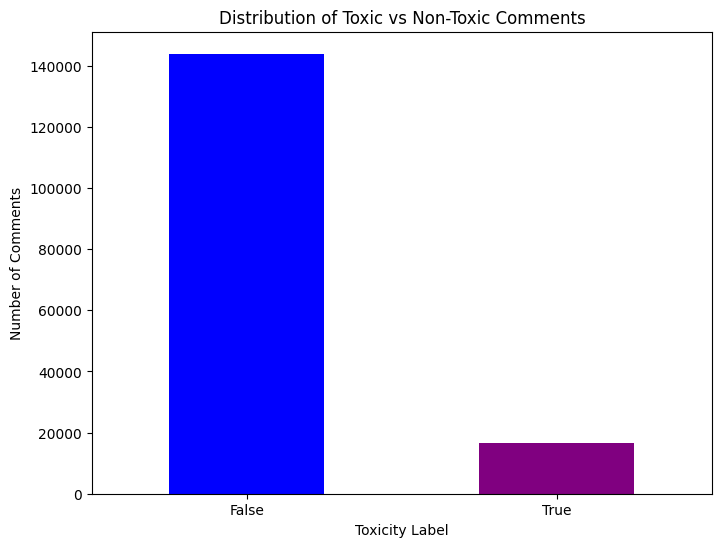

In [11]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(8, 6))

# Count the occurrences of 'Toxic' values
toxic_counts = df_combined['Toxic'].value_counts()

# Plot the counts as a bar chart with custom colors
toxic_counts.plot(kind='bar', color=['blue', 'purple'])  # Hex codes for green and red

# Add title and labels
plt.title('Distribution of Toxic vs Non-Toxic Comments')
plt.xlabel('Toxicity Label')
plt.ylabel('Number of Comments')

# Ensure x-axis labels are horizontal
plt.xticks(rotation=0)

# Display the plot
plt.show()


In [12]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Wordcloud for Toxic Comments

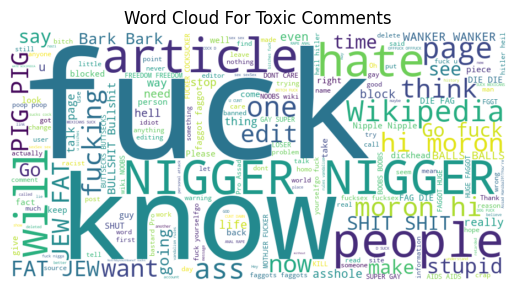

In [13]:

#"Wordcloud" is for creating word cloud visualization.
from wordcloud import WordCloud
#Creating Word Cloud of Toxic Comments
toxic_comments = ' '.join(df_combined[df_combined['Toxic']==True]['Text'])
toxic_words = WordCloud(width=900, height=450, background_color="white").generate(toxic_comments)
plt.imshow(toxic_words, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud For Toxic Comments")
plt.show()

Wordcloud for Non-Toxic Comments

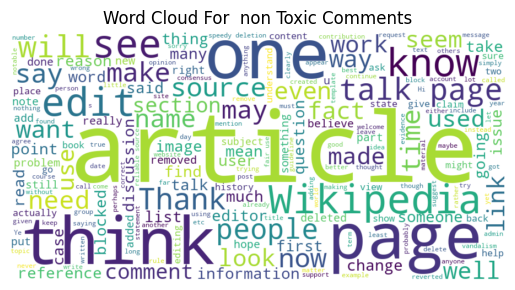

In [14]:

#"Wordcloud" is for creating word cloud visualization.
from wordcloud import WordCloud
#Creating Word Cloud of Toxic Comments
toxic_comments = ' '.join(df_combined[df_combined['Toxic']==False]['Text'])
toxic_words = WordCloud(width=900, height=450, background_color="white").generate(toxic_comments)
plt.imshow(toxic_words, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud For  non Toxic Comments")
plt.show()

Text Preprocessing 

In [15]:
CHARS_TO_REMOVE = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—'
trans_table = str.maketrans('', '', CHARS_TO_REMOVE)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", " cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    
    # Preserve more of the original text structure by not replacing all non-word characters
    # text = re.sub(r'\W', ' ', text)  # Comment out or remove this line if you find it alters important words

    text = re.sub(r'\s+', ' ', text)
    text = text.translate(trans_table)
    text = text.strip()
    
    return text


In [16]:
df_combined['Toxic'] = df_combined['Toxic'].astype(int)
df_combined['Text'] = df_combined['Text'].map(lambda cleaned : clean_text(cleaned))


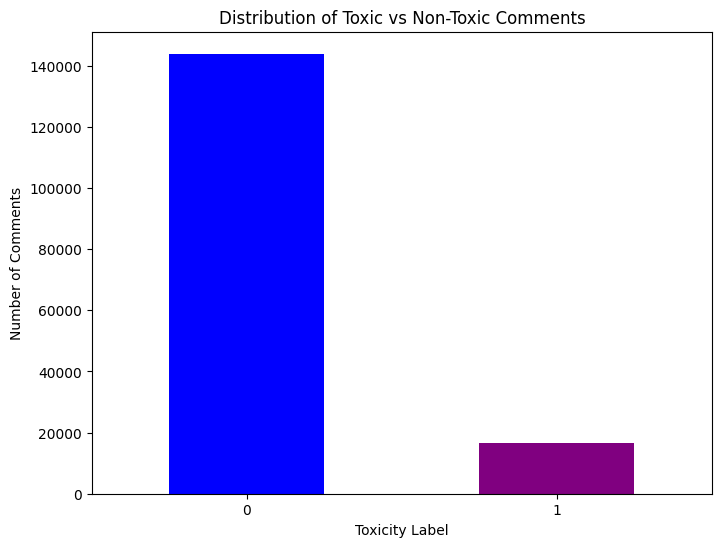

In [17]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(8, 6))

# Count the occurrences of 'Toxic' values
toxic_counts = df_combined['Toxic'].value_counts()

# Plot the counts as a bar chart with custom colors
toxic_counts.plot(kind='bar', color=['blue', 'purple'])  # Hex codes for green and red

# Add title and labels
plt.title('Distribution of Toxic vs Non-Toxic Comments')
plt.xlabel('Toxicity Label')
plt.ylabel('Number of Comments')

# Ensure x-axis labels are horizontal
plt.xticks(rotation=0)

# Display the plot
plt.show()


In [18]:
vect = TfidfVectorizer(max_features=5000, stop_words='english')
X = vect.fit_transform(df_combined['Text'])
Y = df_combined['Toxic']

SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [20]:
df_resampled = pd.DataFrame(X_resampled.todense(), columns=vect.get_feature_names_out())
df_resampled['Toxic'] = y_resampled

# Check the distribution after oversampling
toxic_distribution_after = df_resampled['Toxic'].value_counts()
print("\nDistribution after SMOTE:")
print(toxic_distribution_after)


Distribution after SMOTE:
Toxic
0    143884
1    143884
Name: count, dtype: int64


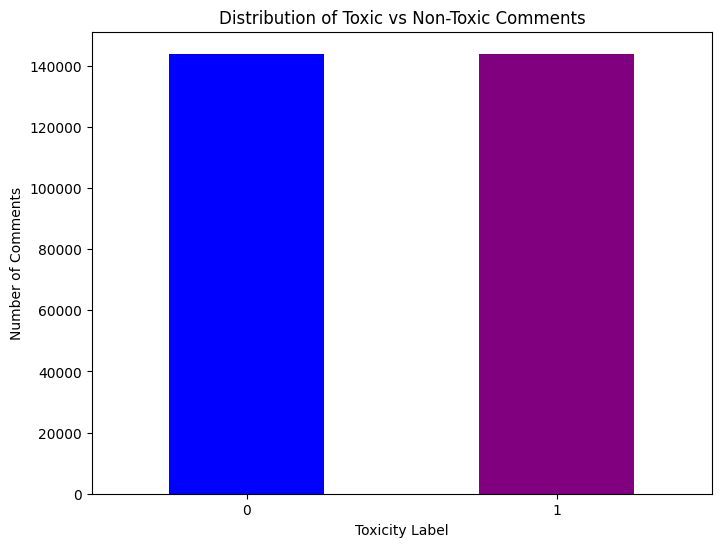

In [21]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(8, 6))

# Count the occurrences of 'Toxic' values
toxic_counts = df_resampled['Toxic'].value_counts()

# Plot the counts as a bar chart with custom colors
toxic_counts.plot(kind='bar', color=['blue', 'purple'])  # Hex codes for green and red

# Add title and labels
plt.title('Distribution of Toxic vs Non-Toxic Comments')
plt.xlabel('Toxicity Label')
plt.ylabel('Number of Comments')

# Ensure x-axis labels are horizontal
plt.xticks(rotation=0)

# Display the plot
plt.show()


MODELLING

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [23]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_resampled.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


c:\Users\talme\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.8915 - loss: 0.2749 - val_accuracy: 0.9530 - val_loss: 0.1309
Epoch 2/20
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.9640 - loss: 0.1088 - val_accuracy: 0.9647 - val_loss: 0.1028
Epoch 3/20
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.9772 - loss: 0.0734 - val_accuracy: 0.9709 - val_loss: 0.0867
Epoch 4/20
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - accuracy: 0.9819 - loss: 0.0583 - val_accuracy: 0.9734 - val_loss: 0.0821
Epoch 5/20
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9851 - loss: 0.0490 - val_accuracy: 0.9753 - val_loss: 0.0778
Epoch 6/20
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9775 - val_loss: 0.0747
Epoch 7/20
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.9878 - loss: 0.0387 - val_accuracy: 0.9782 - val_loss: 0.0735
Epoch 8/20
2878/2878 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.9886 -

In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

1799/1799 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9802 - loss: 0.0742
Test Accuracy: 0.9801


1799/1799 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


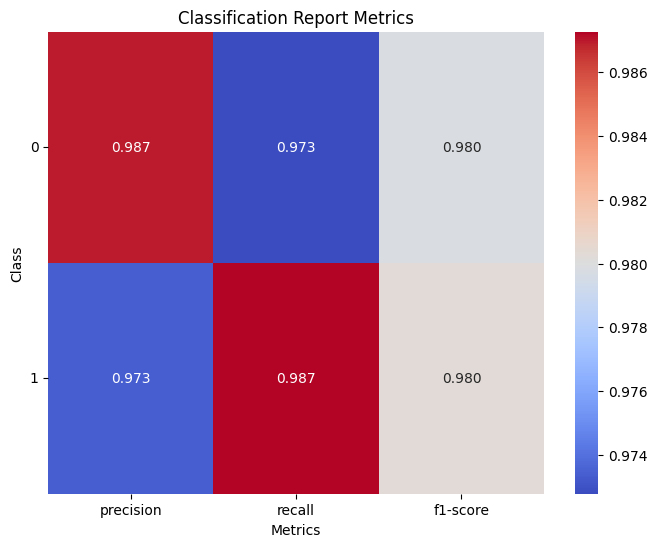

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate predictions on the test set
threshold = 0.5
y_pred_proba = model.predict(x_test)
y_pred = (y_pred_proba > threshold).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Extract relevant metrics for visualization
class_metrics = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotting the classification report metrics using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.yticks(rotation=0)
plt.show()


In [29]:
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(vect, f)

# Save Keras model
model.save('model.keras')